In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit
import warnings
import json
from wafer_plot import draw_wafer_plot

warnings.filterwarnings('ignore')

In [45]:
root_path = Path('/Users/jiahaozhan/Google Drive/Other Computers/CM300/Dione_wafer3_BO')
data_path = root_path / 'pdk_detector_highspeed_test_cells_30C'

dark_curr = {}
photo_curr = {}
device_no = 9

dark_curr_all = {}  # for box plot

df_ref = pd.read_json(data_path / 'reticle0' / 'pdk_detector_highspeed_test_cells.json')
data_dir_gen = sorted(data_path.glob(f'reticle*/*.json'))
for d in data_dir_gen:
    df = pd.read_json(d)
    ret = df['reticle'][0]
    if ret == 0:
        print(df['device'][0])
        print(df['smu_current'][0])
    dark_curr[ret], photo_curr[ret] = np.multiply(df['smu_current'][device_no][0], 1000), df['smu_current'][device_no][1]  # unit: nA for dark curr, uA for photocurr

    # for box plot
    dark_curr_ret = []
    
    for dn in range(12): 
        dark_curr_ret.append(1000*df['smu_current'][dn][0][-1])  # dn -> device no, 0 -> choose the dark current list, -1 -> get the current value at 1.1 V bias
        
    dark_curr_all[ret] = dark_curr_ret
    
volts = [0, 0.3, 0.6, 0.9, 1.1]
print(df_ref.columns)
print(dark_curr_all)

pdk_detector_highspeed_test_structure__ge_width_0p8__l_taper_10 
[[-8.96506e-05, 0.0034449650000000004, 0.00504282, 0.006750795, 0.008038914000000001], [257.142, 261.0882, 263.1664, 265.0148, 266.0465]]
Index(['Unnamed: 0', 'test_cell', 'device_no', 'device', 'position',
       'ge_width', 'l_taper', 'reticle', 'power_ch1_mW', 'laser_power',
       'smu_voltage', 'smu_current', 'chuck_temperature', 'date'],
      dtype='object')
{0: [8.038914000000002, 20.202830000000002, 11.033299999999999, 20.30219, 9.798855, 8.661519000000002, 7.51342, 9.088505, 13.357990000000001, 10.968480000000001, 8.084323000000001, 21.07638], 1: [10.254880000000002, 9.377383000000002, 9.230421000000002, 8.782256, 9.240828, 8.804083, 13.75063, 12.13836, 8.628682, 12.68764, 9.391092, 7.966884], 10: [8.73455, 40.7084, 22.66871, 15.17729, 9.903419, 9.386932, 8.128014, 9.903275, 18.11902, 9.48795, 8.776692, 10.11266], 11: [11.677980000000002, 10.281450000000001, 11.18076, 9.214844, 9.806714000000001, 10.9932, 11.776

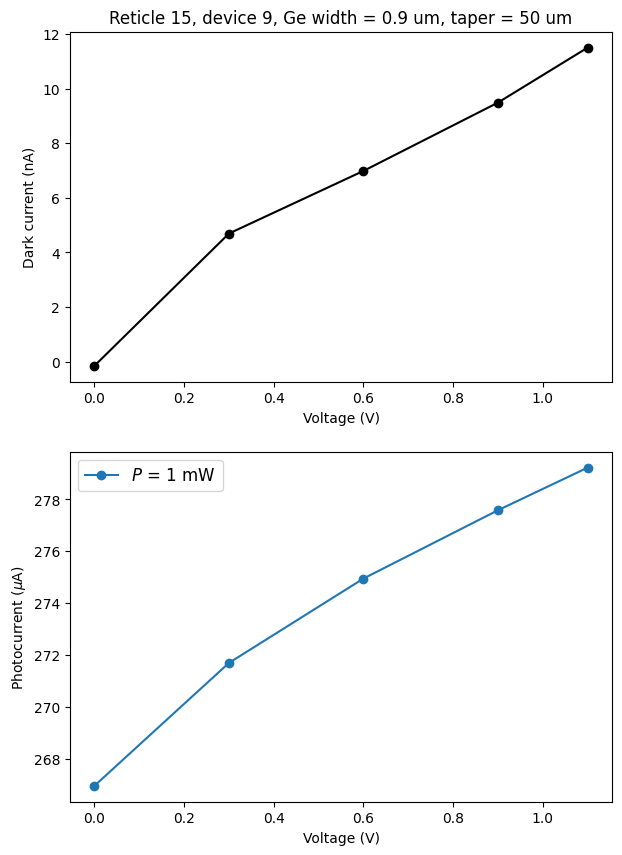

In [47]:
# Plot the current data
ret = 15
ge_w = df_ref['ge_width'][device_no]
taper_l = df_ref['l_taper'][device_no]

fig, axes = plt.subplots(2, 1, figsize=(7, 10))
ax = axes[0]
ax.plot(volts, dark_curr[ret], 'o-', color='k')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Dark current (nA)')
ax.set_title(f'Reticle {ret}, device {device_no}, Ge width = {ge_w} um, taper = {taper_l} um')
ax = axes[1]
ax.plot(volts, photo_curr[ret], 'o-', label='$P$ = 1 mW')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Photocurrent ($\mu$A)')
ax.legend(prop={'size':12})

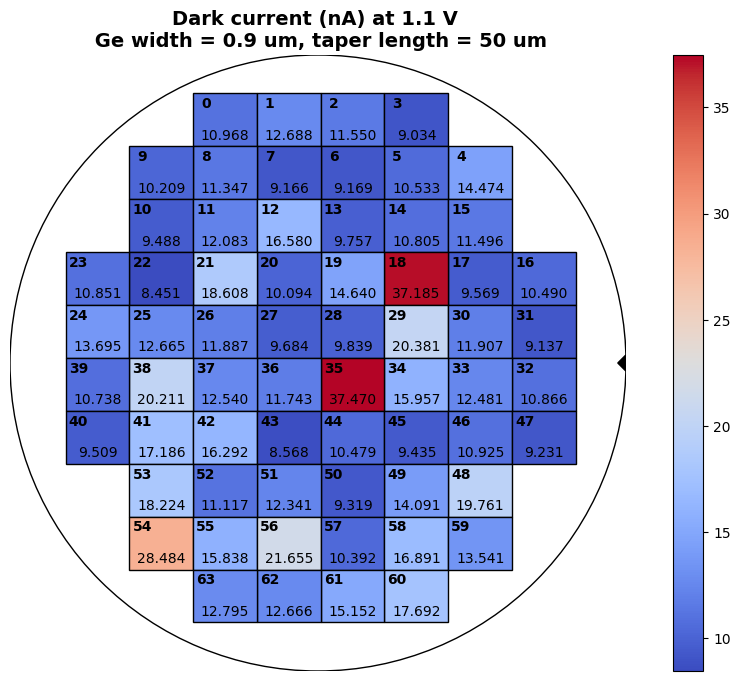

In [48]:
# get a wafer plot
dark_curr_1p1V = {ret:dc[-1] for ret, dc in dark_curr.items()}
title = f'Dark current (nA) at 1.1 V \n Ge width = {ge_w} um, taper length = {taper_l} um'

draw_wafer_plot(data=dark_curr_1p1V, title=title)

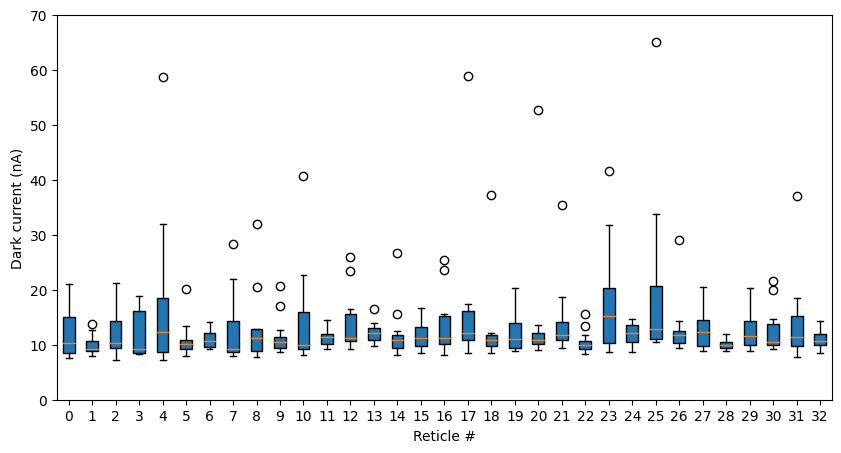

In [53]:
# draw box plots
sorted_dict = {key:dark_curr_all[key] for key in sorted(dark_curr_all.keys())}
data = list(sorted_dict.values())[:33]
labels = list(sorted_dict.keys())[:33]

fig, ax = plt.subplots(1, 1, figsize=[10, 5])
ax.boxplot(data, patch_artist=True, labels=labels, showfliers=True)
# ax.set_title(f'Ridge loss variation at 1310 nm, width = {w} um')
ax.set_xlabel('Reticle #')
ax.set_ylabel('Dark current (nA)')
ax.set_ylim([0, 70])
plt.show()